# IMPORT LIBRARY

In [3]:
# Data Manipulation and Graph
import pandas as pd
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df= pd.read_csv('Regresi A5_final.csv')
df.head(10)

,year,month,day,stasiun,pm10,pm25,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida
0,2024,1,1,DKI5 Kebon Jeruk Jakarta Barat,58.0,99.0,40.0,18.0,55.0,12.0
1,2024,1,2,DKI5 Kebon Jeruk Jakarta Barat,40.0,68.0,40.0,9.0,65.0,11.0
2,2024,1,3,DKI5 Kebon Jeruk Jakarta Barat,32.0,54.0,39.0,7.0,63.0,10.0
3,2024,1,4,DKI5 Kebon Jeruk Jakarta Barat,38.0,59.0,46.0,10.0,55.0,12.0
4,2024,1,5,DKI5 Kebon Jeruk Jakarta Barat,30.0,52.0,37.0,15.0,48.0,15.0
5,2024,1,6,DKI5 Kebon Jeruk Jakarta Barat,32.0,64.0,39.0,12.0,61.0,14.0
6,2024,1,7,DKI5 Kebon Jeruk Jakarta Barat,53.0,86.0,40.0,23.0,62.0,14.0
7,2024,1,8,DKI5 Kebon Jeruk Jakarta Barat,37.0,55.0,38.0,12.0,43.0,14.0
8,2024,1,9,DKI5 Kebon Jeruk Jakarta Barat,54.0,81.0,21.0,18.0,35.0,3.0
9,2024,1,10,DKI5 Kebon Jeruk Jakarta Barat,43.0,73.0,18.0,11.0,70.0,7.0


# DATA SPLITTING

In [ ]:
import os
def data_spliting (percent):
    df = pd.read_csv('csv/Regresi A5_final.csv')
    split_point = int(len(df) * percent)
    train = df[:split_point]
    test = df[split_point:]

    file_path_train = os.path.join('csv', f'data_train_{percent}.csv')
    file_path_test = os.path.join('csv', f'data_test_{percent}.csv')

    train.to_csv(file_path_train, index=False)
    test.to_csv(file_path_test, index=False)
    
data_spliting(0.7) #70%
data_spliting(0.8) #80%

# MODEL TRAINING

## Linear Regression

RMSE: 5.04109415982588
R² Score: -0.07867660647412511


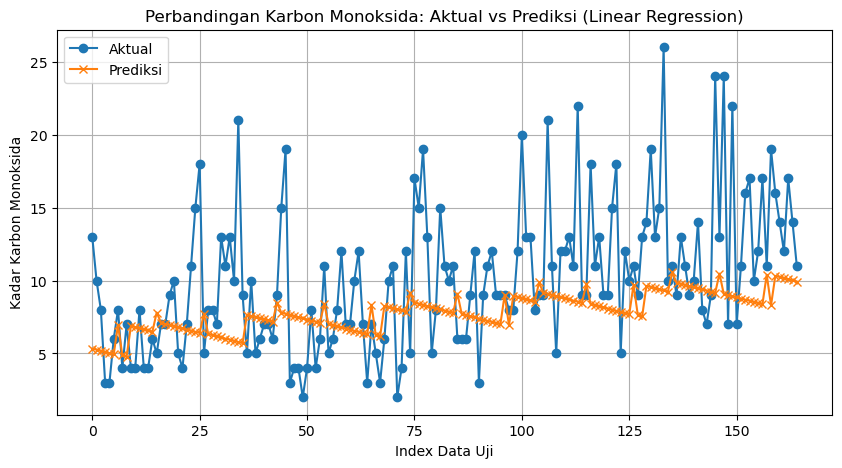

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Baca data train & test ---
train_df = pd.read_csv("csv/data_train_0.7.csv")
test_df = pd.read_csv("csv/data_test_0.7.csv")

# --- Fitur & target ---
X_train = train_df[["tahun", "bulan", "tanggal", "stasiun"]]
y_train = train_df["karbon_monoksida"]

X_test = test_df[["tahun", "bulan", "tanggal", "stasiun"]]
y_test = test_df["karbon_monoksida"]

# --- Preprocessing kategori + numerik ---
categorical_features = ["stasiun"]
numeric_features = ["tahun", "bulan", "tanggal"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# --- Pipeline regresi linear ---
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# --- Latih model ---
model.fit(X_train, y_train)

# --- Prediksi ---
y_pred = model.predict(X_test)

# --- Evaluasi ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

# --- Plot hasil ---
plt.figure(figsize=(10,5))

plt.plot(y_test.values, label="Aktual", marker='o')
plt.plot(y_pred, label="Prediksi", marker='x')

plt.title("Perbandingan Karbon Monoksida: Aktual vs Prediksi (Linear Regression)")
plt.xlabel("Index Data Uji")
plt.ylabel("Kadar Karbon Monoksida")
plt.legend()
plt.grid(True)
plt.show()


### S1: 70/30

### S2: 80/20

## Gradient Boosting

### S1: 70/30

### S2: 80/20

## ADA Boost

### S1: 70/30

### S2: 80/20

## XG Boost

### S1: 70/30

### S2: 80/20

# MODEL EVALUATION

## MAE

## RMSE

## MAPE

## R-squared

# Export Requirements.txt

In [ ]:
import pkg_resources

packages = [
    'pandas',
    'scikit-learn',
]

with open("lukas_requirements.txt", "w") as f:
    for pkg in packages:
        try:
            version = pkg_resources.get_distribution(pkg).version
            f.write(f"{pkg}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"Package {pkg} not found in the environment.")
